In [13]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #images 28x28 digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


#parameters for training
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics =['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2724 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1085 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0738 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0428 - accuracy: 0.9862


In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 936us/step - loss: 0.0885 - accuracy: 0.9756
0.08853297680616379 0.975600004196167


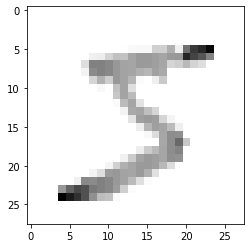

In [16]:
import matplotlib.pyplot as plt

#plot the images 
plt.imshow(x_train[0] , cmap = plt.cm.binary)
plt.show()


In [17]:
model.save('numberrecog.model')

INFO:tensorflow:Assets written to: numberrecog.model\assets


In [18]:
new_model = tf.keras.models.load_model('numberrecog.model')

In [19]:
predictions = new_model.predict([x_test])

In [25]:
import numpy as np
print(np.argmax(predictions[5]))

1


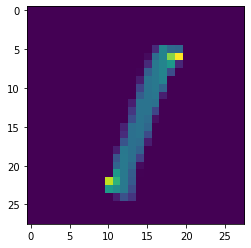

In [24]:
plt.imshow(x_test[5])